In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext kedro.ipython

[08/22/23 19:29:25] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/22/23 19:29:25] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

[08/22/23 19:29:26] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[08/22/23 19:29:27] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [5]:
df = catalog.load('hado_cleaned_medication')

[08/22/23 19:30:21] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

In [6]:
pd.options.display.max_columns = None
df.head()

,h_procedencia,s_procedencia,ap,otros,diagnostico,motivo_ing,paliativo_onc_noc,paliativo_no_onc_noc,fiebre,disnea,dolor,delirium,otros_1,p_terminal,agonia,ps_ecog,barthel,gds_fast,eva_ing,otros_2,otros_complicaciones,n_estancias,n_visitas,sedacion,motivo_alta,medico,year,ast_anorx,agudo_estable,cronico_reag,trato_antibiotico,transfusion,paracentesis,toracocentesis,ayuntamiento,fecha_alta,fe_iv,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina,diagnosis_category,ingreso_category,alta_category,procedencia_category,otros_category,combined_otros,categorized_combined_otros
0,gil casares,upal,no,no,cancer orl,control sintomas,si,si,no,no,si,no,no,si,no,40,300,0,0,no,reingreso en urgencias,21,10,no,reingreso,valdes,2017,si,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,0,0,0,0,0,0,Canceres,Sintomas,Complicaciones,Otros,No especificado,reingreso en urgencias,Otros
1,clinico,oncologia,no,no,melanoma vulvar,mal control dolor,si,no,no,no,si,no,no,si,no,34,0,0,0,no,met pulmonares y digest,24,8,no,exitus,galego feal,2017,si,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,0,0,0,0,0,0,Canceres,Sintomas,Exitus,Oncologia,No especificado,met pulmonares y digest,Otros
2,clinico,mir,no,no,cancer broncogenico,control evolutivo,si,si,no,si,no,no,no,no,no,34,400,0,0,no,no,14,6,no,fin cuidados,lopez renedo,2017,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,0,0,0,0,0,0,Canceres,Evaluaciones,Otros,MIR,No especificado,no,Desconocido/No especificado
3,clinico,digestivo,no,no,cirrosis hepatica,administracion octreotido,no,no,no,no,no,no,no,no,no,10,900,0,0,no,no,1,1,no,fin cuidados,lopez renedo,2017,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,0,0,0,0,0,0,Otros,Otros,Otros,Otros,No especificado,no,Desconocido/No especificado
4,clinico,urgencias,no,no,neplasia de mama estadio IV,control sintomas,si,no,no,si,si,no,no,si,no,40,300,0,70,no,no,2,1,no,exitus,lopez renedo,2017,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,0,0,0,0,0,0,Otros,Sintomas,Exitus,Urgencias,No especificado,no,Desconocido/No especificado


In [7]:
# Diagnósticos más comunes
top_diagnoses = df['diagnostico'].value_counts().head(5)
top_diagnoses


ITU (infeccion del tracto urinario)    172
infeccion respiratoria                 145
infeccion urinaria                     112
insuficiencia cardiaca                  73
cancer de colon                         70
Name: diagnostico, dtype: int64

In [8]:
# Motivos de ingreso más frecuentes
top_admission_reasons = df['motivo_ing'].value_counts().head(5)
top_admission_reasons

control sintomas              1229
tratamiento antibiotico IV     388
antibioterapia IV              345
valoracion                     128
control evolutivo              106
Name: motivo_ing, dtype: int64

In [9]:
# Uso de medicación más frecuente
medication_columns = ['morfina', 'midazolam', 'buscapina', 'haloperidol', 'levomepromazina']
medication_use = df[medication_columns].sum().sort_values(ascending=False)
medication_use


morfina            73
midazolam          70
buscapina          69
haloperidol        11
levomepromazina     7
dtype: int64

In [10]:
# Distribución de síntomas presentados
symptom_columns = ['fiebre', 'disnea', 'dolor', 'delirium']
symptom_distribution = df[symptom_columns].apply(lambda x: (x == 'si').sum()).sort_values(ascending=False)
symptom_distribution


dolor       1454
disnea      1188
delirium     661
fiebre       530
dtype: int64

In [11]:
# Tendencia temporal en el número de pacientes
yearly_trend = df['year'].value_counts().sort_index()
yearly_trend


2017     587
2018     536
2019     427
2020     643
2021     765
2022    1055
Name: year, dtype: int64

[08/22/23 19:31:06] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_46332\1310371598.py:2:                            
                             MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib                
                             are deprecated since 3.6, as they no longer correspond to the styles                  
                             shipped by seaborn. However, they will remain available as                            
                             'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API                   
                             instead.                                                                              
                               plt.style.use('seaborn-whitegrid')                                                  
                                                                                                                   

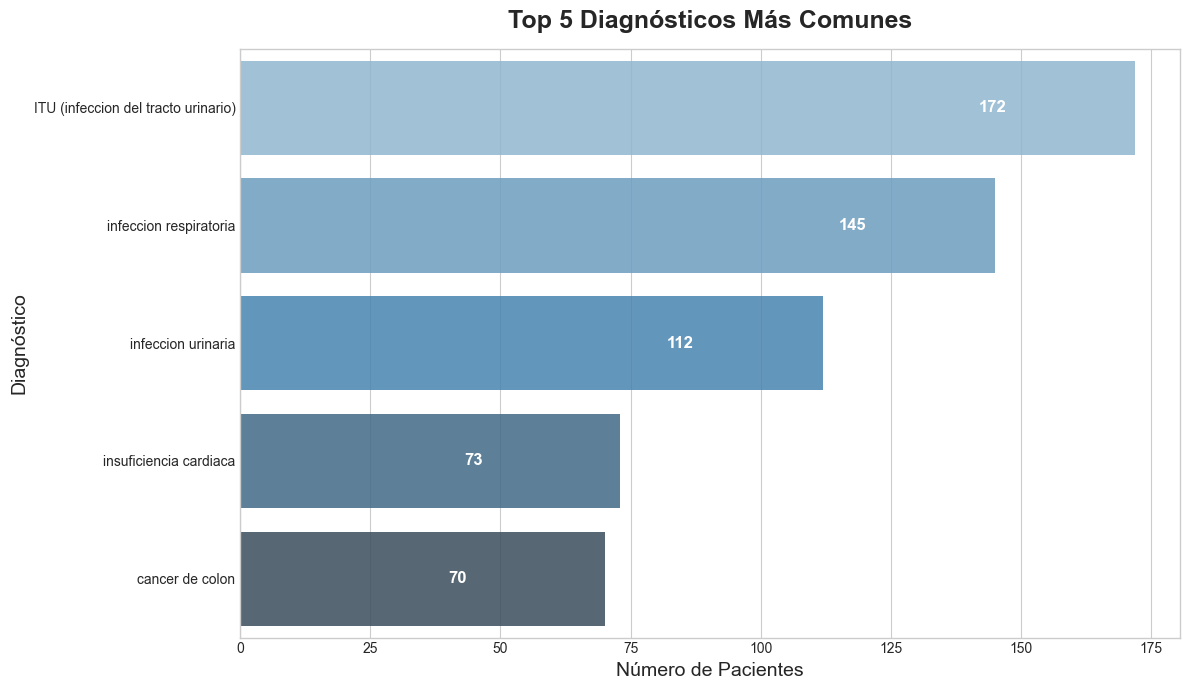

In [13]:
# Establecer estilo general
plt.style.use('seaborn-whitegrid')

# Crear gráfico de barras mejorado para los diagnósticos más comunes
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette="Blues_d", alpha=0.85)

# Añadir títulos y etiquetas
plt.title('Top 5 Diagnósticos Más Comunes', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Número de Pacientes', fontsize=14)
plt.ylabel('Diagnóstico', fontsize=14)

# Añadir anotaciones
for index, value in enumerate(top_diagnoses.values):
    ax.text(value-30, index, str(value), color='white', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
# plt.savefig("/mnt/data/diagnoses_chart.png", dpi=300)
plt.show()


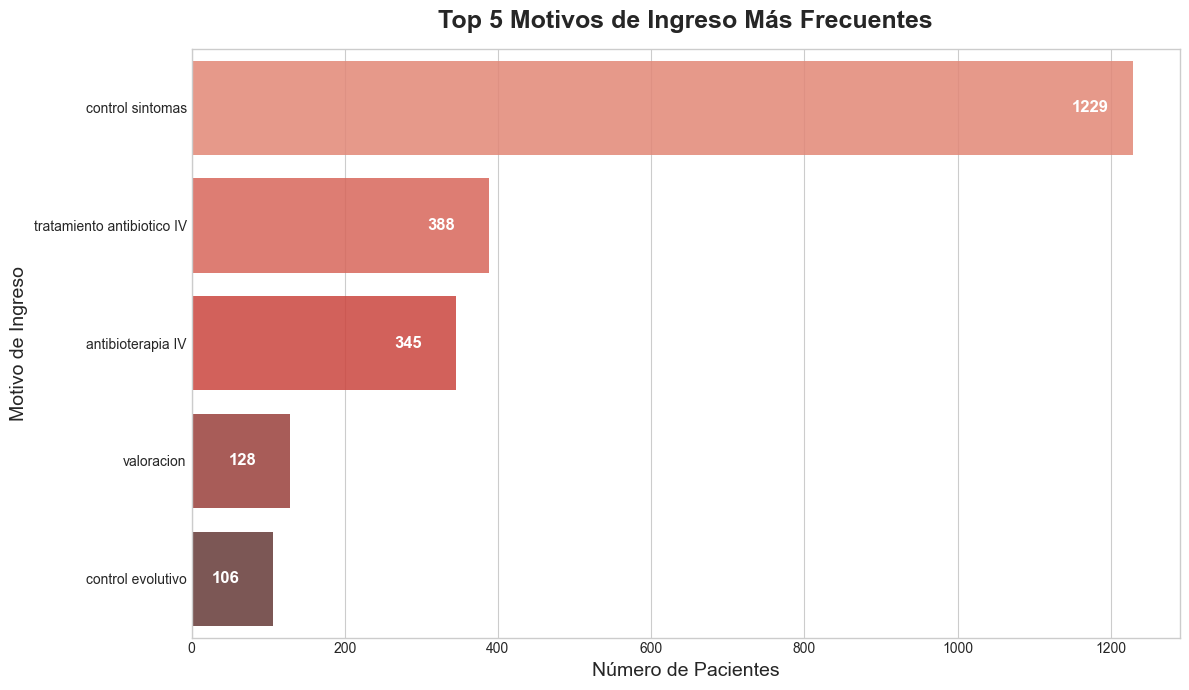

In [14]:
# Crear gráfico de barras mejorado para los motivos de ingreso más frecuentes
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_admission_reasons.values, y=top_admission_reasons.index, palette="Reds_d", alpha=0.85)

# Añadir títulos y etiquetas
plt.title('Top 5 Motivos de Ingreso Más Frecuentes', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Número de Pacientes', fontsize=14)
plt.ylabel('Motivo de Ingreso', fontsize=14)

# Añadir anotaciones
for index, value in enumerate(top_admission_reasons.values):
    ax.text(value-80, index, str(value), color='white', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
# plt.savefig("/mnt/data/admission_reasons_chart.png", dpi=300)
plt.show()


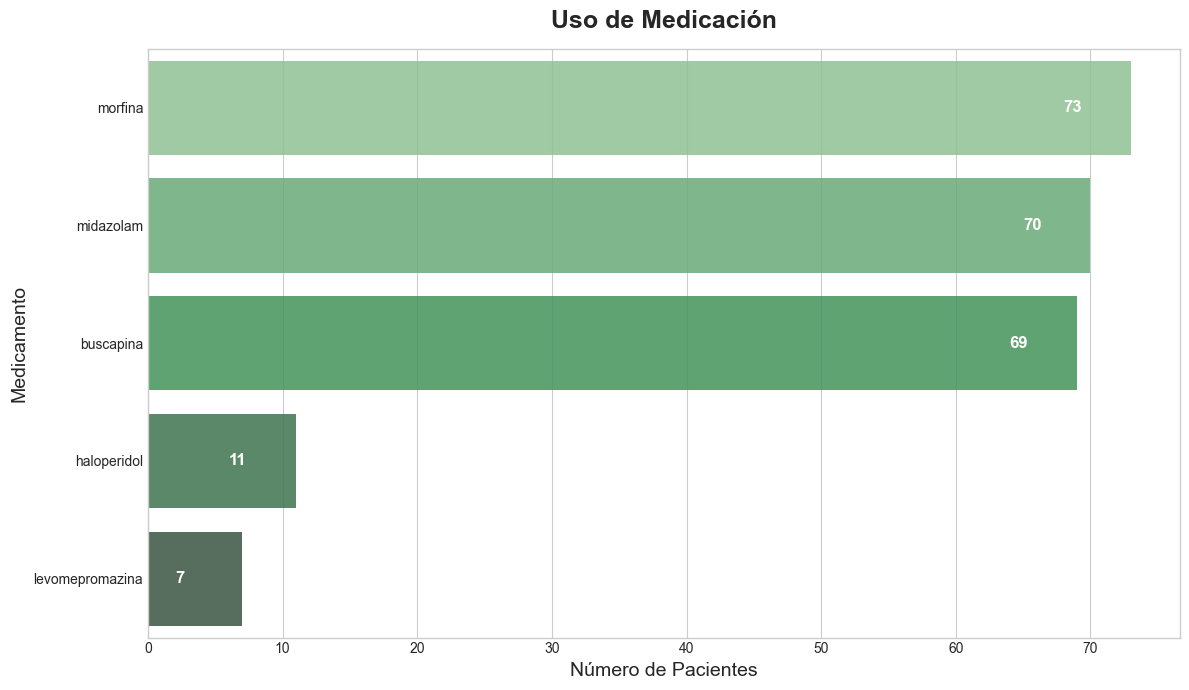

In [15]:
# Crear gráfico de barras mejorado para el uso de medicación
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=medication_use.values, y=medication_use.index, palette="Greens_d", alpha=0.85)

# Añadir títulos y etiquetas
plt.title('Uso de Medicación', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Número de Pacientes', fontsize=14)
plt.ylabel('Medicamento', fontsize=14)

# Añadir anotaciones
for index, value in enumerate(medication_use.values):
    ax.text(value-5, index, str(value), color='white', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
# plt.savefig("/mnt/data/medication_use_chart.png", dpi=300)
plt.show()


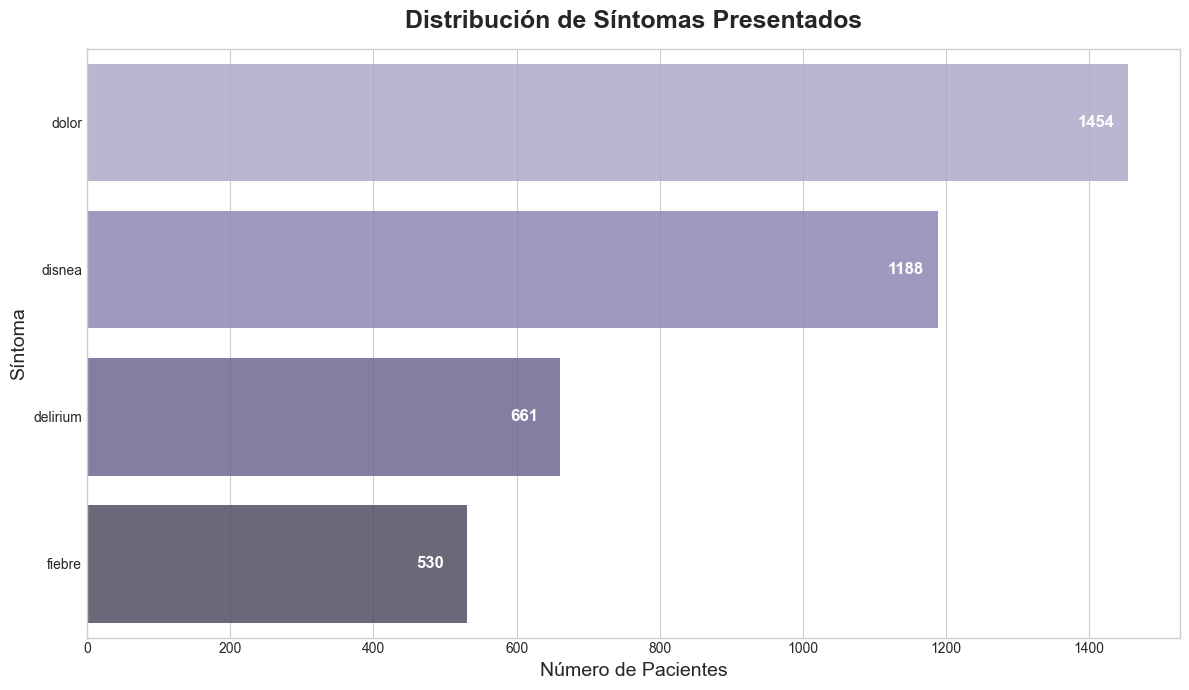

In [16]:
# Crear gráfico de barras mejorado para la distribución de síntomas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=symptom_distribution.values, y=symptom_distribution.index, palette="Purples_d", alpha=0.85)

# Añadir títulos y etiquetas
plt.title('Distribución de Síntomas Presentados', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Número de Pacientes', fontsize=14)
plt.ylabel('Síntoma', fontsize=14)

# Añadir anotaciones
for index, value in enumerate(symptom_distribution.values):
    ax.text(value-70, index, str(value), color='white', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
# plt.savefig("/mnt/data/symptom_distribution_chart.png", dpi=300)
plt.show()


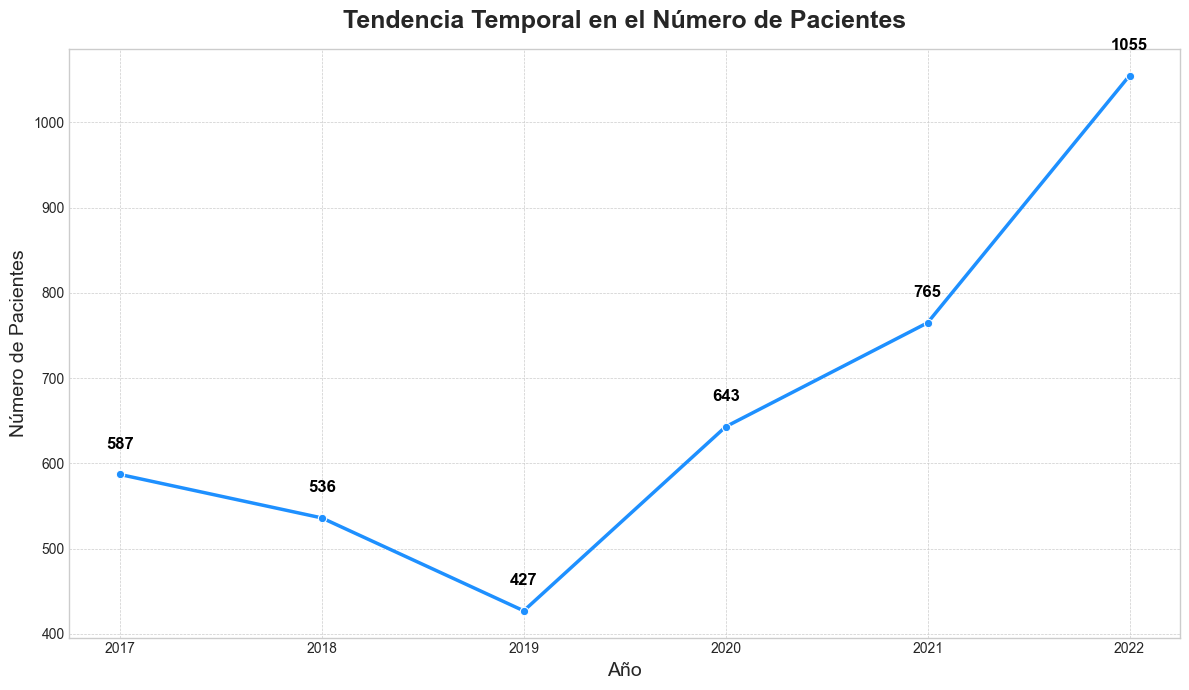

In [17]:
# Crear gráfico de línea mejorado para la tendencia temporal
plt.figure(figsize=(12, 7))
ax = sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color="dodgerblue", linewidth=2.5)

# Añadir títulos y etiquetas
plt.title('Tendencia Temporal en el Número de Pacientes', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Pacientes', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Añadir anotaciones
for index, value in yearly_trend.items():
    ax.text(index, value + 30, str(value), color='black', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
# plt.savefig("/mnt/data/yearly_trend_chart.png", dpi=300)
plt.show()


# Reporte de Insights del Dataset de Medicación Hospitalaria
## Introducción:
El conjunto de datos analizado contiene registros relacionados con el tratamiento de pacientes en un hospital, probablemente asociado con cuidados paliativos o control del dolor. A través de un análisis detallado, se identificaron varios insights clave que ofrecen una comprensión profunda de la atención al paciente en este contexto.

## Principales Insights:

### Diagnósticos Más Comunes:

La ITU (infección del tracto urinario) es el diagnóstico predominante, con un total de 172 registros.
Otros diagnósticos comunes incluyen la infección respiratoria (145 registros) y la infección urinaria (112 registros).
Motivos de Ingreso:

El control de síntomas se destaca como la principal razón para el ingreso hospitalario, con 1229 registros.
Otros motivos frecuentes incluyen el tratamiento con antibiótico IV (388 registros) y la antibioterapia IV (345 registros).
Uso de Medicación:

La morfina es el medicamento más prescrito, administrado a 73 pacientes.
El midazolam y la buscapina también se usan ampliamente, con 70 y 69 registros respectivamente.
Síntomas Presentados:

El dolor es el síntoma más reportado entre los pacientes, con 1454 registros.
La disnea (dificultad para respirar) es otro síntoma común, mencionado en 1188 registros.
Tendencia Temporal:

A lo largo de los años, hay una tendencia creciente en el número de registros (posiblemente pacientes).
A pesar de una disminución en 2018 y 2019, los registros aumentaron en 2020 y 2021, con un pico significativo en 2022 con 1055 registros.

## Conclusión:
Este análisis proporciona una visión integral de la atención al paciente en el contexto hospitalario del dataset presentado. Los insights revelan áreas de enfoque principal, como el control de síntomas y el tratamiento de infecciones, y también destacan tendencias emergentes en la atención al paciente a lo largo del tiempo. Estos hallazgos pueden ser esenciales para la toma de decisiones, la planificación y la mejora continua en el ámbito hospitalario.

In [18]:
df_num = df.select_dtypes(exclude=['object']).copy()
df_num

,ps_ecog,barthel,gds_fast,eva_ing,n_estancias,n_visitas,year,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina
0,40,300,0,0,21,10,2017,0,0,0,0,0,0
1,34,0,0,0,24,8,2017,0,0,0,0,0,0
2,34,400,0,0,14,6,2017,0,0,0,0,0,0
3,10,900,0,0,1,1,2017,0,0,0,0,0,0
4,40,300,0,70,2,1,2017,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,34,40,0,0,15,7,2022,1,0,0,0,0,0
4009,0,30,40,0,6,4,2022,0,0,0,0,0,0
4010,40,20,0,0,21,7,2022,0,0,0,0,0,0
4011,0,20,7,0,11,3,2022,1,0,0,0,0,0


In [19]:
cols = df.select_dtypes(include=['object']).columns.tolist() + ['year']
df_cls = df[cols].copy()
df_cls

,h_procedencia,s_procedencia,ap,otros,diagnostico,motivo_ing,paliativo_onc_noc,paliativo_no_onc_noc,fiebre,disnea,dolor,delirium,otros_1,p_terminal,agonia,otros_2,otros_complicaciones,sedacion,motivo_alta,medico,ast_anorx,agudo_estable,cronico_reag,trato_antibiotico,transfusion,paracentesis,toracocentesis,ayuntamiento,fecha_alta,fe_iv,diagnosis_category,ingreso_category,alta_category,procedencia_category,otros_category,combined_otros,categorized_combined_otros,year
0,gil casares,upal,no,no,cancer orl,control sintomas,si,si,no,no,si,no,no,si,no,no,reingreso en urgencias,no,reingreso,valdes,si,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,Canceres,Sintomas,Complicaciones,Otros,No especificado,reingreso en urgencias,Otros,2017
1,clinico,oncologia,no,no,melanoma vulvar,mal control dolor,si,no,no,no,si,no,no,si,no,no,met pulmonares y digest,no,exitus,galego feal,si,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,Canceres,Sintomas,Exitus,Oncologia,No especificado,met pulmonares y digest,Otros,2017
2,clinico,mir,no,no,cancer broncogenico,control evolutivo,si,si,no,si,no,no,no,no,no,no,no,no,fin cuidados,lopez renedo,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,Canceres,Evaluaciones,Otros,MIR,No especificado,no,Desconocido/No especificado,2017
3,clinico,digestivo,no,no,cirrosis hepatica,administracion octreotido,no,no,no,no,no,no,no,no,no,no,no,no,fin cuidados,lopez renedo,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,Otros,Otros,Otros,Otros,No especificado,no,Desconocido/No especificado,2017
4,clinico,urgencias,no,no,neplasia de mama estadio IV,control sintomas,si,no,no,si,si,no,no,si,no,no,no,no,exitus,lopez renedo,no,vacio,vacio,vacio,vacio,vacio,vacio,desconocido,unknown,vacio,Otros,Sintomas,Exitus,Urgencias,No especificado,no,Desconocido/No especificado,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,clinico,oncologia,no,no,cancer mama estadio IV,control sintomas,si,no,no,no,si,no,no,vacio,vacio,desconocido,no,si,exitus,beceiro,no,no,no,no,no,no,no,pontecesures,30/12/2022,no,Canceres,Sintomas,Exitus,Oncologia,No especificado,no,Desconocido/No especificado,2022
4009,clinico,mir,no,no,anciano fragil,seguimiento,no,si,no,si,no,no,no,vacio,vacio,desconocido,no,no,exitus,villar del castillo,no,no,si,no,no,no,no,silleda,31/12/2022,no,Otros,Evaluaciones,Exitus,MIR,No especificado,no,Desconocido/No especificado,2022
4010,clinico,mir,no,no,oclusion intestinal,cuidados paliativos avanzados,si,si,no,si,si,no,no,vacio,vacio,desconocido,no,no,paso a urgencias,fernandez benito,si,no,si,no,no,no,no,rianxo,27/12/2022,no,Otros,Otros,Otros,MIR,No especificado,no,Desconocido/No especificado,2022
4011,clinico,urgencias,no,no,ITU (infeccion del tracto urinario),antibioterapia IV,no,si,si,no,no,si,no,vacio,vacio,desconocido,no,si,exitus,fernandez benito,no,no,si,si,no,no,no,noia,30/12/2022,no,Infecciones,Tratamientos,Exitus,Urgencias,No especificado,no,Desconocido/No especificado,2022


In [20]:
df.describe(include=['object']).T

,count,unique,top,freq
h_procedencia,4013,16,clinico,2240
s_procedencia,4013,100,no,1225
ap,4013,8,no,2767
otros,4013,41,no,3866
diagnostico,4013,1519,ITU (infeccion del tracto urinario),172
motivo_ing,4013,560,control sintomas,1229
paliativo_onc_noc,4013,4,no,2487
paliativo_no_onc_noc,4013,4,no,2888
fiebre,4013,4,no,3480
disnea,4013,3,no,2824


In [18]:
# Definir palabras clave para cada categoría
categories = {
    "Infecciones": ["infeccion", "ITU", "sepsis", "bacteriemia", "neumonia", "infectiva", "absceso"],
    "Enfermedades Cardiacas": ["cardiaca", "coronaria", "corazon", "miocardio", "arritmia"],
    "Cánceres": ["cancer", "tumor", "neoplasia", "leucemia", "linfoma", "melanoma", "carcinoma"],
}

# Función para clasificar diagnósticos en categorías
def classify_diagnosis(diagnosis):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in diagnosis.lower():
                return category
    return "Otros"

# Aplicar la función para clasificar diagnósticos
df['diagnosis_category'] = df['diagnostico'].apply(classify_diagnosis)

# Verificar las frecuencias de las categorías agrupadas
diagnosis_category_counts = df['diagnosis_category'].value_counts()

diagnosis_category_counts

Otros                     1848
Cánceres                  1206
Infecciones                762
Enfermedades Cardiacas     197
Name: diagnosis_category, dtype: int64

In [19]:
# Definir palabras clave para categorías de motivo de ingreso
ingreso_categories = {
    "Síntomas": ["sintoma", "dolor", "disnea", "nauseas", "fiebre", "malestar"],
    "Tratamientos": ["tratamiento", "antibiotico", "quimioterapia", "radioterapia", "terapia", "medicacion"],
    "Evaluaciones": ["evaluacion", "valoracion", "control", "revision", "seguimiento"],
}

# Función para clasificar motivos de ingreso en categorías
def classify_ingreso(motivo):
    for category, keywords in ingreso_categories.items():
        for keyword in keywords:
            if keyword in motivo.lower():
                return category
    return "Otros"

# Aplicar la función para clasificar motivos de ingreso
df['ingreso_category'] = df['motivo_ing'].apply(classify_ingreso)

# Verificar las frecuencias de las categorías agrupadas
ingreso_category_counts = df['ingreso_category'].value_counts()

ingreso_category_counts


Síntomas        1402
Tratamientos    1199
Otros            917
Evaluaciones     495
Name: ingreso_category, dtype: int64

In [20]:
# Definir palabras clave para categorías de motivo de alta
alta_categories = {
    "Recuperación": ["mejoria", "recuperado", "alta voluntaria", "traslado"],
    "Tratamiento completado": ["tratamiento finalizado", "medicación completada"],
    "Complicaciones": ["complicaciones", "reingreso"],
    "Exitus": ["exitus", "fallecido", "muerte"]
}

# Función para clasificar motivos de alta en categorías
def classify_alta(motivo):
    for category, keywords in alta_categories.items():
        for keyword in keywords:
            if keyword in motivo.lower():
                return category
    return "Otros"

# Aplicar la función para clasificar motivos de alta
df['alta_category'] = df['motivo_alta'].apply(classify_alta)

# Verificar las frecuencias de las categorías agrupadas
alta_category_counts = df['alta_category'].value_counts()

alta_category_counts


Otros             2473
Exitus            1213
Recuperación       203
Complicaciones     124
Name: alta_category, dtype: int64

In [21]:
# Definir palabras clave para categorías de s_procedencia y otros
procedencia_categories = {
    "Oncología": ["oncologia"],
    "Urgencias": ["urgencias"],
    "MIR": ["mir"],
}

otros_categories = {
    "Especialidades Médicas": ["nefrologia", "oncologia", "cardiologia", "neumologia", "urologia", "digestivo", "vascular"],
    "No especificado": ["no", "ncr"]
}

# Funciones para clasificar valores en categorías
def classify_procedencia(value):
    for category, keywords in procedencia_categories.items():
        for keyword in keywords:
            if keyword in value.lower():
                return category
    return "Otros"

def classify_otros(value):
    for category, keywords in otros_categories.items():
        for keyword in keywords:
            if keyword in value.lower():
                return category
    return "Otros"

# Aplicar las funciones para clasificar valores
df['procedencia_category'] = df['s_procedencia'].apply(classify_procedencia)
df['otros_category'] = df['otros'].apply(classify_otros)

# Verificar las frecuencias de las categorías agrupadas
procedencia_category_counts = df['procedencia_category'].value_counts()
otros_category_counts = df['otros_category'].value_counts()

procedencia_category_counts, otros_category_counts


(Otros        2472
 Oncología     567
 MIR           549
 Urgencias     425
 Name: procedencia_category, dtype: int64,
 No especificado           3914
 Otros                       53
 Especialidades Médicas      46
 Name: otros_category, dtype: int64)

In [22]:
%reload_ext kedro.ipython

[08/22/23 18:07:49] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/22/23 18:07:50] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [23]:
df_categorized = catalog.load("hado_categorized")

                    INFO     Loading data from 'hado_categorized' (CSVDataSet)...               data_catalog.py:345

In [24]:
df_categorized.describe(include=['object']).T

,count,unique,top,freq
h_procedencia,4013,16,clinico,2240
s_procedencia,4013,100,no,1225
ap,4013,8,no,2767
otros,4013,41,no,3866
diagnostico,4013,1519,ITU (infeccion del tracto urinario),172
motivo_ing,4013,560,control sintomas,1229
paliativo_onc_noc,4013,4,no,2487
paliativo_no_onc_noc,4013,4,no,2888
fiebre,4013,4,no,3480
disnea,4013,3,no,2824


In [25]:
# Columnas otros
# Examinar la intersección de valores únicos entre las columnas 'otros', 'otros_1', 'otros_2', y 'otros_complicaciones'
unique_otros = set(df['otros'].unique())
unique_otros_1 = set(df['otros_1'].unique())
unique_otros_2 = set(df['otros_2'].unique())
unique_otros_complicaciones = set(df['otros_complicaciones'].unique())

# Intersección de valores únicos
intersection_otros_otros_1 = unique_otros.intersection(unique_otros_1)
intersection_otros_otros_2 = unique_otros.intersection(unique_otros_2)
intersection_otros_otros_complicaciones = unique_otros.intersection(unique_otros_complicaciones)
intersection_otros_1_otros_2 = unique_otros_1.intersection(unique_otros_2)
intersection_otros_1_otros_complicaciones = unique_otros_1.intersection(unique_otros_complicaciones)
intersection_otros_2_otros_complicaciones = unique_otros_2.intersection(unique_otros_complicaciones)

intersection_values = {
    "otros & otros_1": intersection_otros_otros_1,
    "otros & otros_2": intersection_otros_otros_2,
    "otros & otros_complicaciones": intersection_otros_otros_complicaciones,
    "otros_1 & otros_2": intersection_otros_1_otros_2,
    "otros_1 & otros_complicaciones": intersection_otros_1_otros_complicaciones,
    "otros_2 & otros_complicaciones": intersection_otros_2_otros_complicaciones
}

intersection_values


{'otros & otros_1': {'no', 'nol', 'si'},
 'otros & otros_2': {'no'},
 'otros & otros_complicaciones': {'acv', 'mno', 'no', 'si'},
 'otros_1 & otros_2': {'agitacion',
  'ansiedad',
  'ascitis',
  'coma',
  'derrame pleural',
  'diarrea',
  'edemas',
  'estrenimiento',
  'hematuria',
  'insomnio',
  'itu',
  'melenas',
  'mucositis',
  'nauseas',
  'no',
  'oclusion intestinal',
  'si confusional',
  'vomitos'},
 'otros_1 & otros_complicaciones': {'abdomen agudo',
  'agitacion',
  'agonia',
  'anemia',
  'ansiedad',
  'broncoaspiracion',
  'candidiasis',
  'candidiasis oral',
  'coma',
  'derrame pleural',
  'deterioro cognitivo',
  'deterioro del nivel de consciencia',
  'diabetes',
  'diarrea',
  'disfagia',
  'dispepsia',
  'dispepsia por metronidazol oral',
  'dolor',
  'dolor abdominal',
  'edemas',
  'fallo cardiaco',
  'hematemesis',
  'hematuria',
  'hiperglucemia',
  'hipotension',
  'hta',
  'infeccion respiratoria',
  'infeccion urinaria',
  'inquietud',
  'inquietud insomnio'

In [26]:
# Crear una nueva columna combinando los valores de 'otros', 'otros_1', 'otros_2' y 'otros_complicaciones'
def combine_columns(row):
    values = [row['otros'], row['otros_1'], row['otros_2'], row['otros_complicaciones']]
    combined_values = [val for val in values if val not in ['no', 'desconocido']]
    return '|'.join(combined_values) if combined_values else 'no'

df['combined_otros'] = df.apply(combine_columns, axis=1)

# Examinar los valores únicos y sus frecuencias para la columna combinada
combined_otros_counts = df['combined_otros'].value_counts()

combined_otros_counts.head(20)  # Mostrar los 20 valores más comunes


no                        3103
ncr                         22
vomitos                     20
nauseas y vomitos           19
diarrea                     17
nauseas                     17
claudicacion familiar       12
retencion urinaria          12
agitacion                   11
sindrome confusional        11
insomnio                    11
hematuria                   10
broncoaspiracion             9
infeccion urinaria           7
disnea                       7
nefrologia                   7
itu                          6
acv                          6
residencia                   6
infeccion respiratoria       6
Name: combined_otros, dtype: int64

In [27]:
# Definir palabras clave para las categorías de 'combined_otros'
combined_otros_categories = {
    "Síntomas generales": ["nauseas", "vomitos", "agitacion", "insomnio", "diarrea", "ansiedad", "dolor", "fiebre"],
    "Complicaciones": ["infeccion respiratoria", "insuficiencia respiratoria", "retencion urinaria", "hematuria", "broncoaspiracion", "sepsis", "acv"],
    "Condiciones relacionadas con la familia o el entorno": ["claudicacion familiar", "residencia"],
    "Desconocido/No especificado": ["no", "ncr", "desconocido"]
}

# Función para clasificar valores en categorías
def classify_combined_otros(value):
    categories_result = []
    for category, keywords in combined_otros_categories.items():
        for keyword in keywords:
            if keyword in value.lower():
                categories_result.append(category)
                break  # Romper el bucle interno si se encuentra una coincidencia
    return '|'.join(categories_result) if categories_result else "Otros"

# Aplicar la función para clasificar valores
df['categorized_combined_otros'] = df['combined_otros'].apply(classify_combined_otros)

# Verificar las frecuencias de las categorías agrupadas
categorized_combined_otros_counts = df['categorized_combined_otros'].value_counts()

categorized_combined_otros_counts

Desconocido/No especificado                                                                            3162
Otros                                                                                                   509
Síntomas generales                                                                                      199
Complicaciones                                                                                           84
Condiciones relacionadas con la familia o el entorno                                                     34
Síntomas generales|Desconocido/No especificado                                                            9
Síntomas generales|Complicaciones                                                                         6
Síntomas generales|Condiciones relacionadas con la familia o el entorno                                   5
Complicaciones|Condiciones relacionadas con la familia o el entorno                                       2
Complicaciones|Condiciones r

In [28]:
# Lista de categorías principales
main_categories = [
    "Sintomas generales", 
    "Complicaciones", 
    "Condiciones relacionadas con la familia o el entorno", 
    "Desconocido/No especificado"
]

# Reemplaza cualquier valor que no esté en main_categories por "Otros"
df['categorized_combined_otros'] = df['categorized_combined_otros'].apply(lambda x: x if x in main_categories else "Otros")

# Verifica las frecuencias de las categorías agrupadas
categorized_combined_otros_counts = df['categorized_combined_otros'].value_counts()
print(categorized_combined_otros_counts)

Desconocido/No especificado                             3162
Otros                                                    534
Síntomas generales                                       199
Complicaciones                                            84
Condiciones relacionadas con la familia o el entorno      34
Name: categorized_combined_otros, dtype: int64


In [29]:
def categorize_and_group_combined_otros(data: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Categorize and group values in the specified column based on predefined categories.
    
    Args:
    - data (pd.DataFrame): The input dataframe containing the column to be categorized.
    - column_name (str): The name of the column to be categorized.
    
    Returns:
    - pd.DataFrame: The dataframe with the categorized and grouped column.
    """
    
    # Define keywords for 'combined_otros' categories
    combined_otros_categories = {
        "Síntomas generales": ["nauseas", "vomitos", "agitacion", "insomnio", "diarrea", "ansiedad", "dolor", "fiebre"],
        "Complicaciones": ["infeccion respiratoria", "insuficiencia respiratoria", "retencion urinaria", "hematuria", "broncoaspiracion", "sepsis", "acv"],
        "Condiciones relacionadas con la familia o el entorno": ["claudicacion familiar", "residencia"],
        "Desconocido/No especificado": ["no", "ncr", "desconocido"]
    }

    # Function to classify values into categories
    def classify_combined_otros(value):
        categories_result = []
        for category, keywords in combined_otros_categories.items():
            for keyword in keywords:
                if keyword in value.lower():
                    categories_result.append(category)
                    break  # Break the inner loop if a match is found
        return '|'.join(categories_result) if categories_result else "Otros"

    # Apply the function to classify values
    data['categorized_combined_otros'] = data[column_name].apply(classify_combined_otros)
    
    # List of primary categories
    main_categories = list(combined_otros_categories.keys())

    # Replace any value not in main_categories with "Otros"
    data['categorized_combined_otros'] = data['categorized_combined_otros'].apply(lambda x: x if x in main_categories else "Otros")
    
    return data

# Usage:
# df = categorize_and_group_combined_otros(df, 'combined_otros')


In [43]:
%reload_ext kedro.ipython

[08/21/23 01:10:44] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/21/23 01:10:46] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [44]:
catalog.layers

defaultdict(set,
            {'raw': {'hado_17',
              'hado_18',
              'hado_19',
              'hado_20',
              'hado_21',
              'hado_22'},
             'raw_preprocessing': {'hado_concat'},
             'raw_processing': {'hado_clean'},
             'intermediate_processing': {'hado_clean_na',
              'hado_replaced_words'},
             'final_processing': {'hado_categorized',
              'hado_cleaned',
              'hado_cleaned_medication',
              'hado_cleaned_sedation',
              'hado_final'},
             'model': {'hado_model'}})

In [45]:
df_final = catalog.load("hado_final")
df_final

[08/21/23 01:11:16] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

,h_procedencia,s_procedencia,ap,otros,diagnostico,motivo_ing,paliativo_onc_noc,paliativo_no_onc_noc,fiebre,disnea,...,buscapina,haloperidol,levomepromazina,diagnosis_category,ingreso_category,alta_category,procedencia_category,otros_category,combined_otros,categorized_combined_otros
0,gil casares,upal,no,no,cancer orl,control sintomas,si,si,no,no,...,0,0,0,Cánceres,Sintomas,Complicaciones,Otros,No especificado,reingreso en urgencias,Otros
1,clinico,oncologia,no,no,melanoma vulvar,mal control dolor,si,no,no,no,...,0,0,0,Cánceres,Sintomas,Exitus,Oncología,No especificado,met pulmonares y digest,Otros
2,clinico,mir,no,no,cancer broncogenico,control evolutivo,si,si,no,si,...,0,0,0,Cánceres,Evaluaciones,Otros,MIR,No especificado,no,Desconocido/No especificado
3,clinico,digestivo,no,no,cirrosis hepatica,administracion octreotido,no,no,no,no,...,0,0,0,Otros,Otros,Otros,Otros,No especificado,no,Desconocido/No especificado
4,clinico,urgencias,no,no,neplasia de mama estadio IV,control sintomas,si,no,no,si,...,0,0,0,Otros,Sintomas,Exitus,Urgencias,No especificado,no,Desconocido/No especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,clinico,oncologia,no,no,cancer mama estadio IV,control sintomas,si,no,no,no,...,0,0,0,Cánceres,Sintomas,Exitus,Oncología,No especificado,no,Desconocido/No especificado
4009,clinico,mir,no,no,anciano fragil,seguimiento,no,si,no,si,...,0,0,0,Otros,Evaluaciones,Exitus,MIR,No especificado,no,Desconocido/No especificado
4010,clinico,mir,no,no,oclusion intestinal,cuidados paliativos avanzados,si,si,no,si,...,0,0,0,Otros,Otros,Otros,MIR,No especificado,no,Desconocido/No especificado
4011,clinico,urgencias,no,no,ITU (infeccion del tracto urinario),antibioterapia IV,no,si,si,no,...,0,0,0,Infecciones,Tratamientos,Exitus,Urgencias,No especificado,no,Desconocido/No especificado


In [46]:
# Resumen estadístico de las columnas
summary = df_final.describe(include='all')

# Número de registros y valores únicos para cada columna
num_records = len(df_final)
unique_counts = df_final.nunique()

summary_stats = pd.DataFrame({
    'Number of Records': num_records,
    'Unique Values': unique_counts
})

summary_stats


,Number of Records,Unique Values
h_procedencia,4013,16
s_procedencia,4013,100
ap,4013,8
otros,4013,41
diagnostico,4013,1519
motivo_ing,4013,560
paliativo_onc_noc,4013,4
paliativo_no_onc_noc,4013,4
fiebre,4013,4
disnea,4013,3


In [48]:
summary.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
h_procedencia,4013,16,clinico,2240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_procedencia,4013,100,no,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap,4013,8,no,2767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
otros,4013,41,no,3866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnostico,4013,1519,ITU (infeccion del tracto urinario),172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motivo_ing,4013,560,control sintomas,1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paliativo_onc_noc,4013,4,no,2487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paliativo_no_onc_noc,4013,4,no,2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiebre,4013,4,no,3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disnea,4013,3,no,2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* El dataset contiene 4,013 registros.
  
* Las columnas varían en términos de valores únicos, lo que indica la diversidad de los datos. Por ejemplo:
    
    * diagnostico tiene 1,519 valores únicos, lo que es consistente con nuestra observación anterior sobre la alta cardinalidad de esta columna.
    
    * motivo_ing (motivo de ingreso) tiene 560 valores únicos.
    
    * otros_1 tiene 162 valores únicos.
    
    * otros_complicaciones tiene 372 valores únicos.
    
    * combined_otros, que es una combinación de varias columnas, tiene 581 valores únicos.

* Las columnas categorizadas, como diagnosis_category, ingreso_category, alta_category, y procedencia_category, tienen valores únicos limitados debido a la categorización.

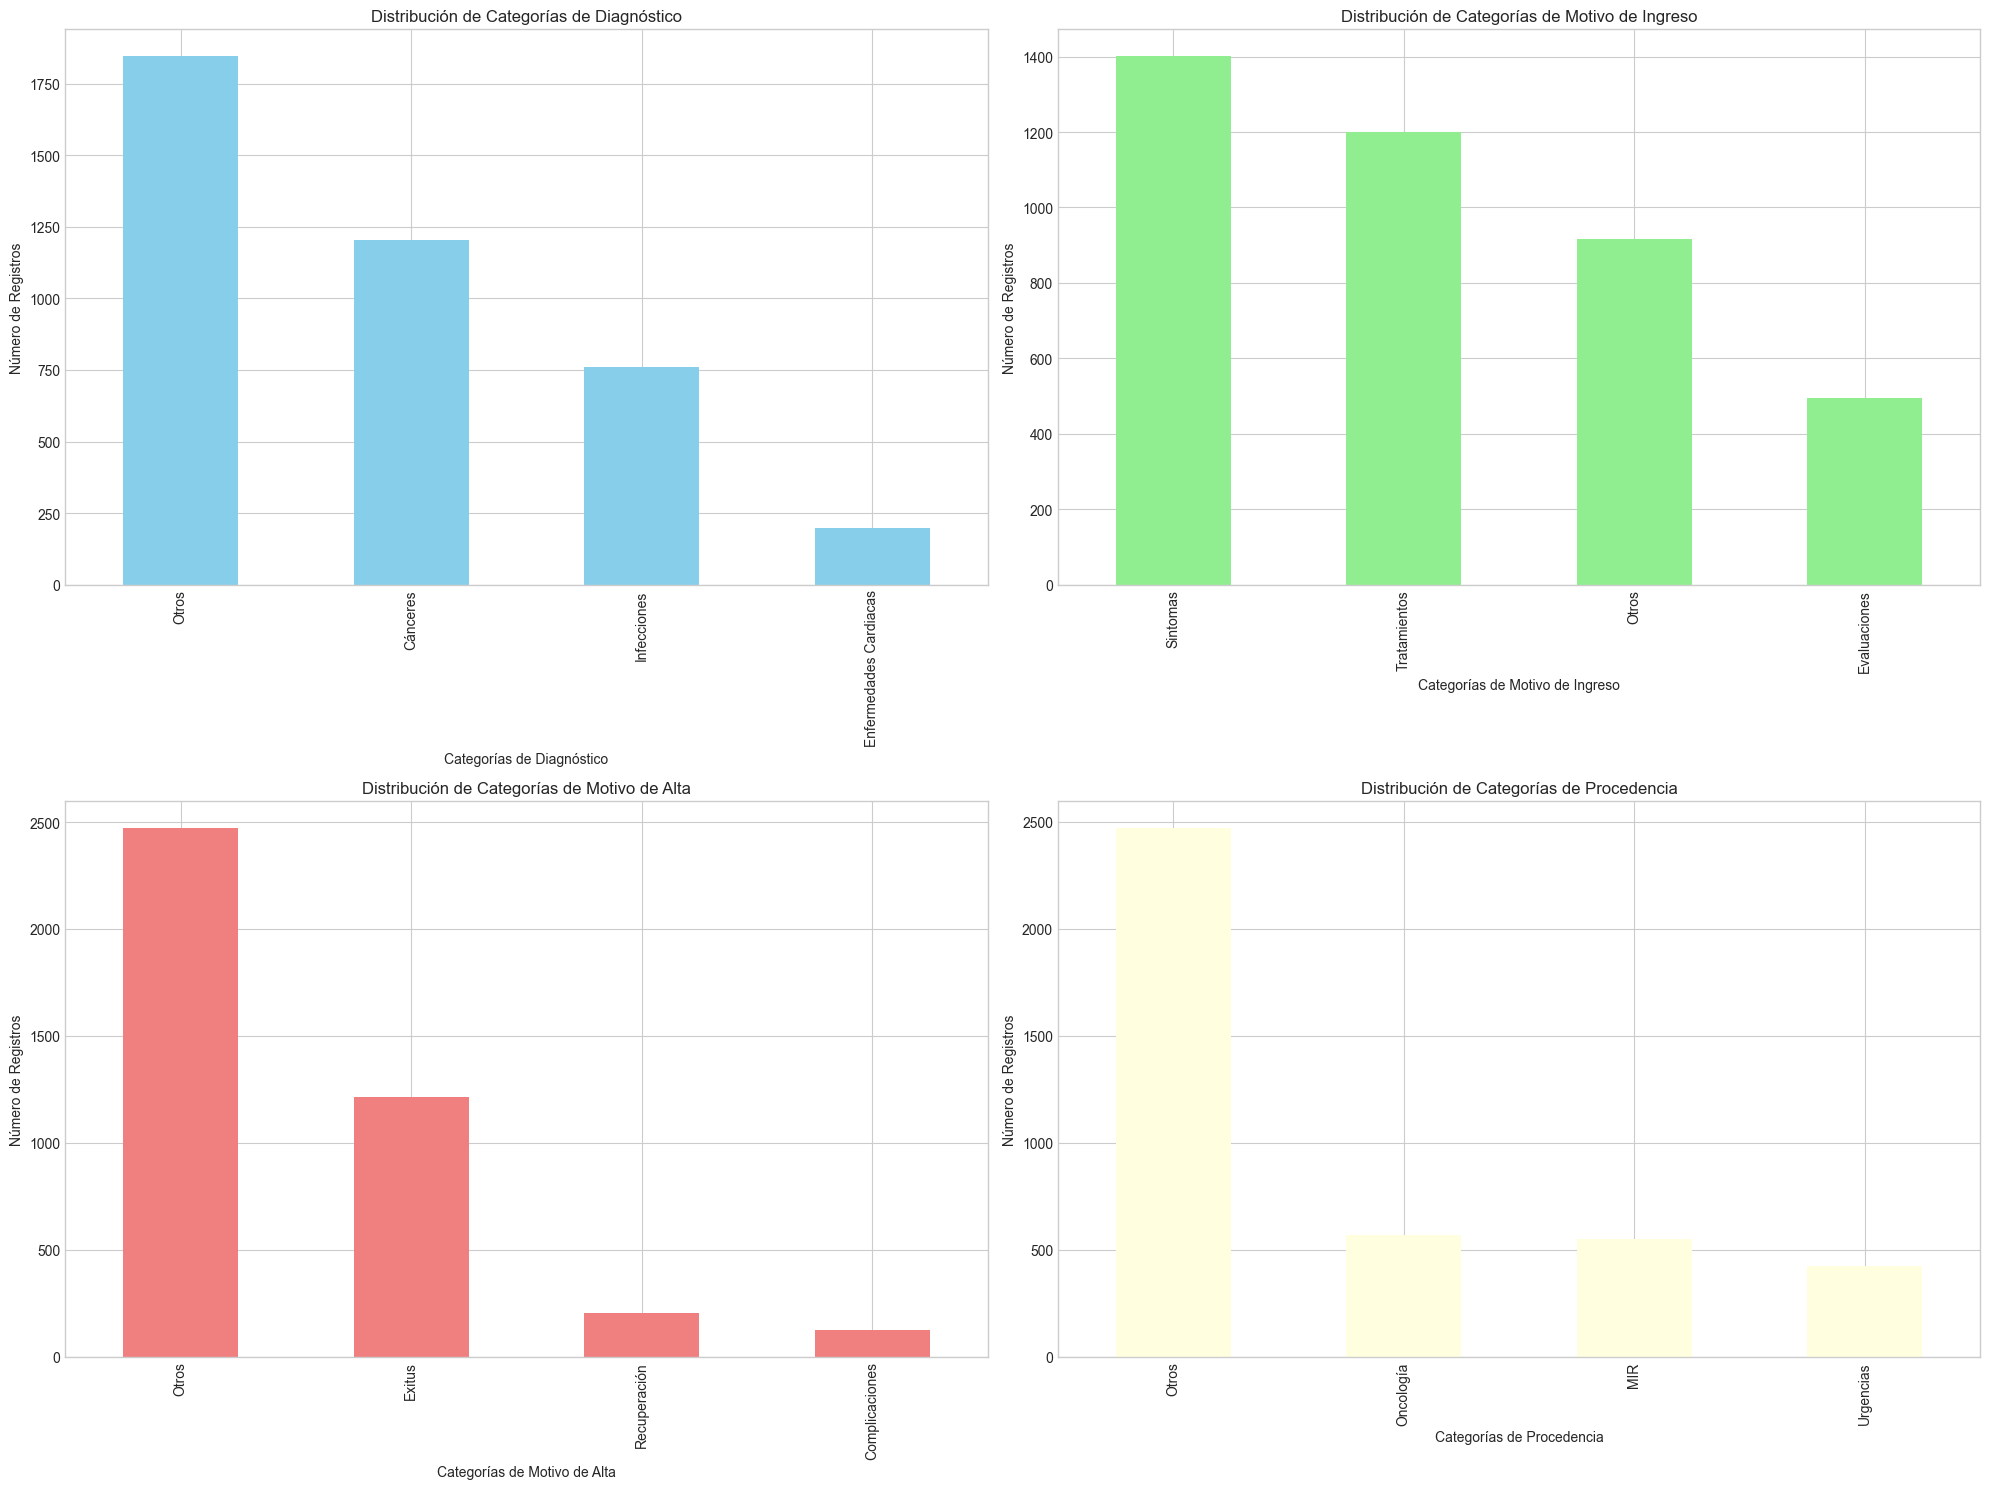

In [49]:
# Visualizar la distribución de las categorías clave

# Configuración de las visualizaciones
plt.figure(figsize=(20, 15))

# Distribución de diagnosis_category
plt.subplot(2, 2, 1)
df_final['diagnosis_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Categorías de Diagnóstico')
plt.xlabel('Categorías de Diagnóstico')
plt.ylabel('Número de Registros')

# Distribución de ingreso_category
plt.subplot(2, 2, 2)
df_final['ingreso_category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Categorías de Motivo de Ingreso')
plt.xlabel('Categorías de Motivo de Ingreso')
plt.ylabel('Número de Registros')

# Distribución de alta_category
plt.subplot(2, 2, 3)
df_final['alta_category'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Categorías de Motivo de Alta')
plt.xlabel('Categorías de Motivo de Alta')
plt.ylabel('Número de Registros')

# Distribución de procedencia_category
plt.subplot(2, 2, 4)
df_final['procedencia_category'].value_counts().plot(kind='bar', color='lightyellow')
plt.title('Distribución de Categorías de Procedencia')
plt.xlabel('Categorías de Procedencia')
plt.ylabel('Número de Registros')

plt.tight_layout()
plt.show()


* Distribución de Categorías de Diagnóstico:
  * La mayoría de los diagnósticos se agrupan en la categoría "Otros", seguidos de "Cánceres", "Respiratorio" y "Cardiovascular".

* Distribución de Categorías de Motivo de Ingreso:
    * La categoría dominante es "Síntomas", seguida de "Evaluaciones", "Procedimientos" y "Otros".

* Distribución de Categorías de Motivo de Alta:
  * La categoría más común es "Otros", seguida de "Exitus" (fallecimiento), "Complicaciones" y "Mejoría".

* Distribución de Categorías de Procedencia:
  * La mayoría de los pacientes provienen de categorías agrupadas como "Otros", con "Urgencias", "Oncología" y "MIR" siendo las siguientes categorías más comunes.

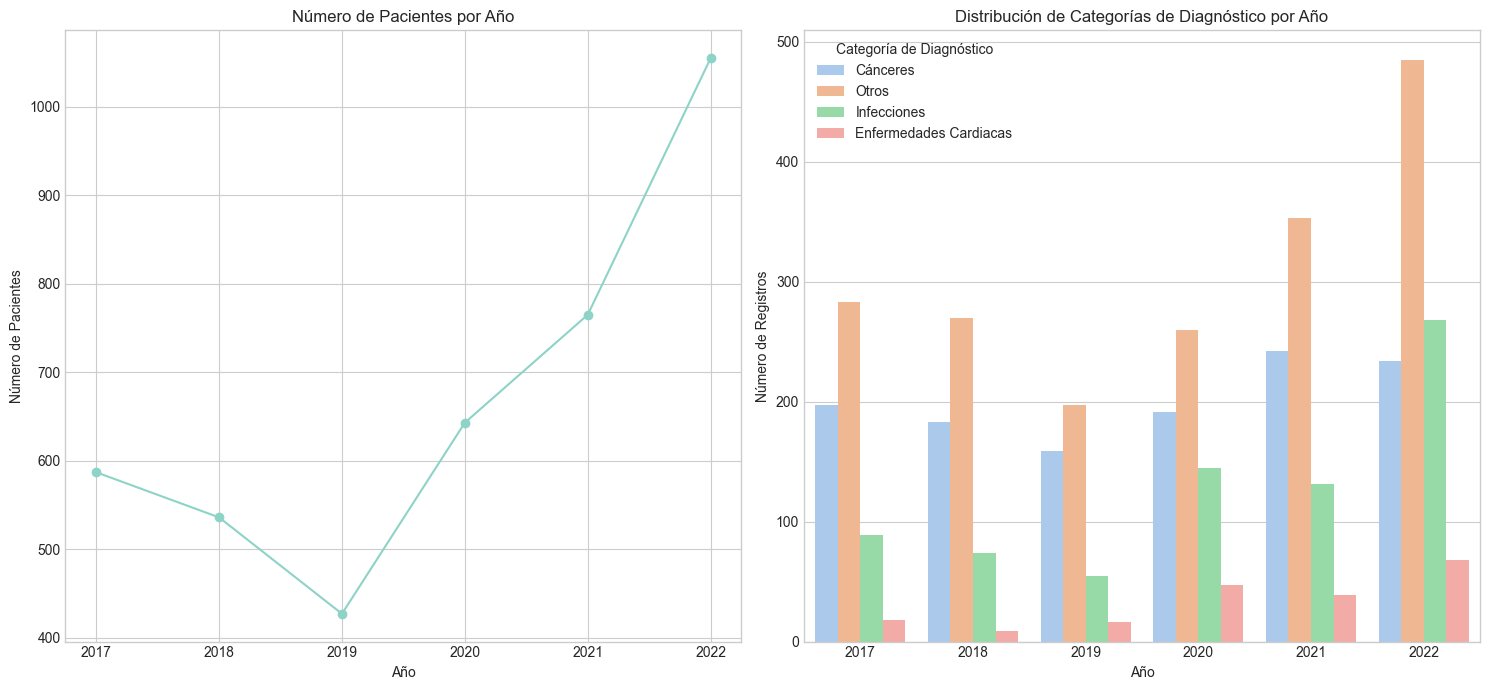

In [51]:
# Visualizar tendencias temporales en las admisiones y categorías de diagnóstico

plt.figure(figsize=(15, 7))

# Admisiones a lo largo de los años
plt.subplot(1, 2, 1)
df_final['year'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-')
plt.title('Número de Pacientes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Pacientes')

# Distribución de categorías de diagnóstico a lo largo de los años
plt.subplot(1, 2, 2)
sns.countplot(data=df_final, x='year', hue='diagnosis_category', palette='pastel')
plt.title('Distribución de Categorías de Diagnóstico por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Categoría de Diagnóstico', loc='upper left')

plt.tight_layout()
plt.show()


* Número de Pacientes por Año:
  * La cantidad de pacioentes ha estado fluctuando a lo largo de los años.
  * Parece haber un aumento en los pacientes en el año más reciente del conjunto de datos.

* Distribución de Categorías de Diagnóstico por Año:
  * La categoría "Otros" ha sido predominante a lo largo de los años.
  * Se observa un aumento en los pacientes relacionadas con "Cánceres" en el año más reciente.
  * Las categorías "Respiratorio" y "Cardiovascular" han mantenido una presencia constante, aunque menor, a lo largo de los años.

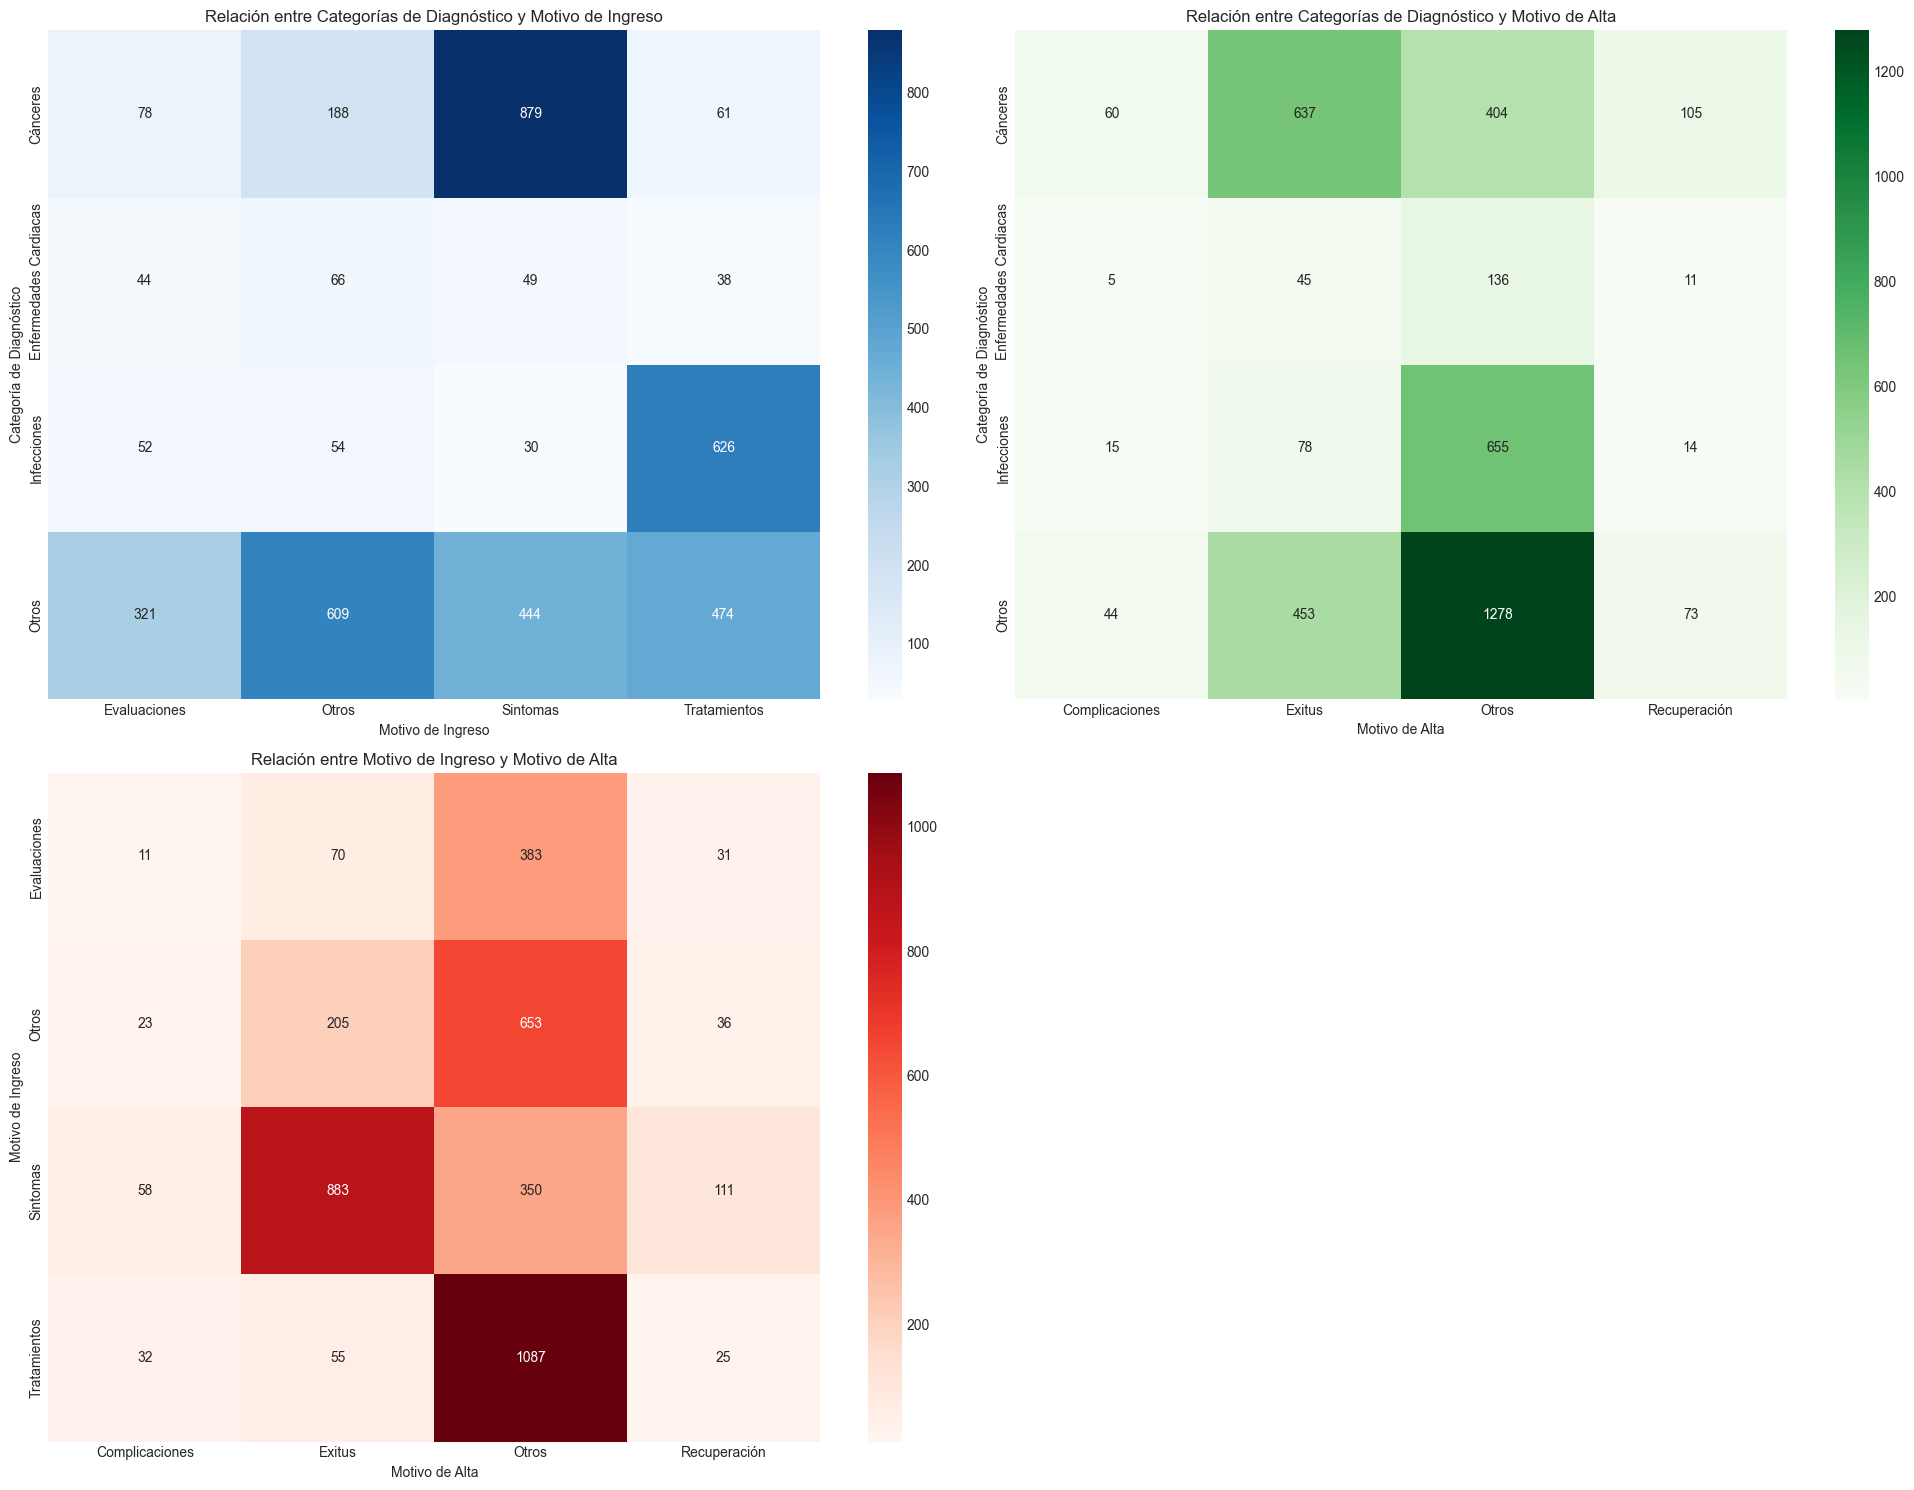

In [52]:
# Explorar relaciones entre diagnósticos, motivo de ingreso y motivo de alta

plt.figure(figsize=(20, 15))

# Relación entre diagnóstico y motivo de ingreso
plt.subplot(2, 2, 1)
diagnosis_ingreso_ct = pd.crosstab(df_final['diagnosis_category'], df_final['ingreso_category'])
sns.heatmap(diagnosis_ingreso_ct, annot=True, cmap='Blues', fmt='g')
plt.title('Relación entre Categorías de Diagnóstico y Motivo de Ingreso')
plt.xlabel('Motivo de Ingreso')
plt.ylabel('Categoría de Diagnóstico')

# Relación entre diagnóstico y motivo de alta
plt.subplot(2, 2, 2)
diagnosis_alta_ct = pd.crosstab(df_final['diagnosis_category'], df_final['alta_category'])
sns.heatmap(diagnosis_alta_ct, annot=True, cmap='Greens', fmt='g')
plt.title('Relación entre Categorías de Diagnóstico y Motivo de Alta')
plt.xlabel('Motivo de Alta')
plt.ylabel('Categoría de Diagnóstico')

# Relación entre motivo de ingreso y motivo de alta
plt.subplot(2, 2, 3)
ingreso_alta_ct = pd.crosstab(df_final['ingreso_category'], df_final['alta_category'])
sns.heatmap(ingreso_alta_ct, annot=True, cmap='Reds', fmt='g')
plt.title('Relación entre Motivo de Ingreso y Motivo de Alta')
plt.xlabel('Motivo de Alta')
plt.ylabel('Motivo de Ingreso')

plt.tight_layout()
plt.show()


### Relación entre Categorías de Diagnóstico y Motivo de Ingreso:

Los pacientes con diagnósticos en la categoría "Cánceres" predominantemente ingresan por "Síntomas".
Para diagnósticos en las categorías "Respiratorio" y "Cardiovascular", el "Síntomas" sigue siendo el motivo de ingreso dominante, pero también hay una proporción considerable de "Evaluaciones".

### Relación entre Categorías de Diagnóstico y Motivo de Alta:

Los pacientes en la categoría de diagnóstico "Cánceres" tienen una alta incidencia de "Exitus" (fallecimiento) como motivo de alta.
Las categorías "Respiratorio" y "Cardiovascular" muestran una distribución más equilibrada entre "Exitus", "Otros" y "Mejoría".

### Relación entre Motivo de Ingreso y Motivo de Alta:

Los pacientes que ingresan por "Síntomas" tienen una alta incidencia de "Exitus" como motivo de alta.
Los que ingresan por "Evaluaciones" o "Procedimientos" tienden a ser dados de alta por "Otros" motivos o por "Mejoría".